# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
%matplotlib inline

# Reading/Importing Data File

In [2]:
df = pd.read_csv('iris.data',header=None)

# Creating Perceptron class

In [3]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """Fit training data.
        Parameters
        Training Simple Machine Learning Algorithms for Classification
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Creating AdalineGD class

In [4]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X,y):
        rgen = np.random.RandomState(self.random_state) 
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 + X.shape[1])
        self.cost_= []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  +=self.eta * errors.sum()
            cost = (errors**2).sum() /2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self,X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0, 1, -1)

# Creating "plot_decision_regions" funtion

In [5]:
def plot_decision_regions(X,y, classifier, resolution = 0.02):
    #set marker generator and color map
    markers = ('s','x', 'o', '^', 'v')
    colors =('red', 'blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max =X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max =X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap =cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class sample
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha = 0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

# Creating AdalineSGD class

In [6]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Randomly initialize weights"""
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

# Ex_1

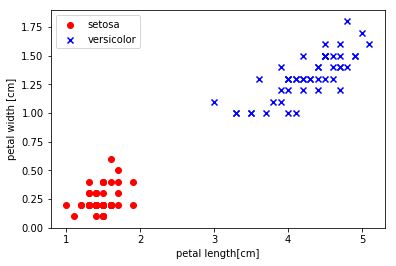

In [7]:
### selecting setosa and versicolor
y=df.iloc[0:100,4]
y=np.where(y=='Iris-setosa', -1,1)
### extracting petal length and petal width
X=df.iloc[0:100,[2,3]].values
### plotting data
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.ylabel('petal width [cm]')
plt.xlabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()

[2, 3, 2, 0, 0, 0, 0, 0, 0, 0]


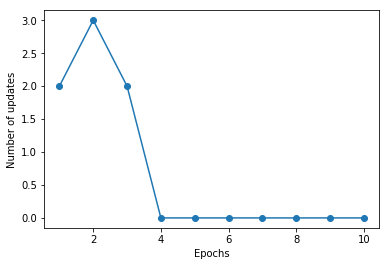

In [8]:
ppn=Perceptron(n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker ='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
print(ppn.errors_)
plt.show()   ### NOT GETTING SAME VALUES ###

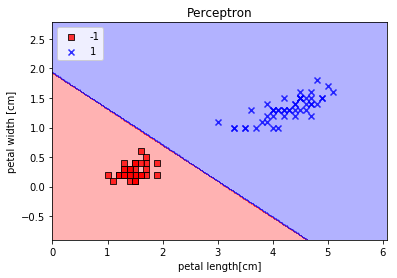

In [9]:
ppn.fit(X,y)
plot_decision_regions(X,y,classifier=ppn)
plt.title('Perceptron')
plt.ylabel('petal width [cm]')
plt.xlabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()   ### NOT GETTING SAME VALUES ###

In [10]:
ppn.w_   ### NOT GETTING SAME VALUES ###

array([-0.04375655,  0.01388244,  0.02271828])

# Ex_2  [pending ada.w_ ]

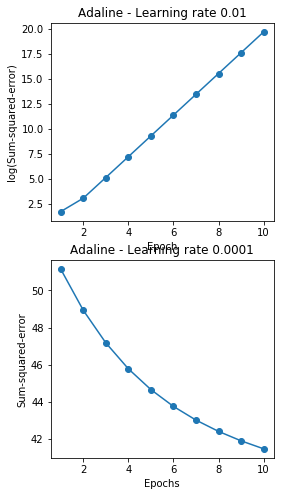

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize =(4,8))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1), np.absolute(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

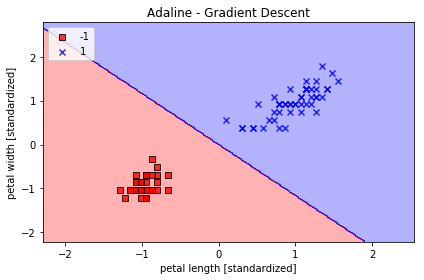

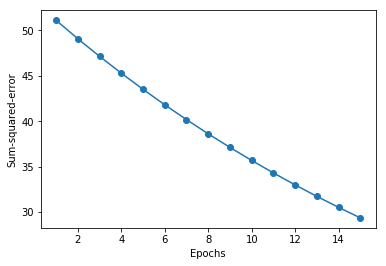

In [12]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [13]:
ada.w_   ### NOT GETTING SAME VALUES ###

array([5.46784840e-17, 9.08990954e-01, 7.82511829e-01])

# Ex_3 [Finished]

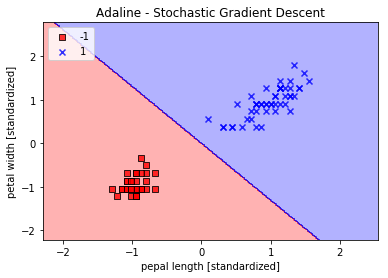

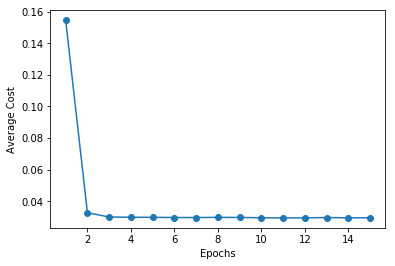

In [14]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('pepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

In [15]:
ada.w_

array([-4.69359355e-04,  5.51362849e-01,  4.22002466e-01])

# Ex_4  [pending mathematical formulas]

In [16]:
## The Adaline (Adaptive Linear Element) and the Perceptron are both linear classifiers when considered 
## as individual units.They both take an input, and based on a threshold, output e.g. either a 0 or a 1. 
## The main difference between the two, is that a Perceptron takes that binary response (like a classification 
## result) and computes an error used to update the weights, whereas an Adaline uses a continous response
## value to update the weights (so before the binarized output is produced). The fact that the Adaline 
## does this, allows its updates to be more repesentative of the actual error, before it is thresholded, 
## which in turn allows a model to converge more quickly.

## In Stochastic Gradient Descent, before for-looping, you need to randomly shuffle the training examples. 

## In Stochastic Gradient Descent, because it’s using only one example at a time, its path to the minima 
## is noisier (more random) than that of the batch gradient. But it’s ok as we are indifferent to the path, 
## as long as it gives us the minimum AND the shorter training time. 

## Mini-batch gradient descent uses n data points (instead of 1 sample in Stochastic Gradient Descent) at 
## each iteration. 